# Current Method Analysis

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel, wilcoxon, shapiro
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import re
import nltk
from fuzzywuzzy import fuzz

### Load data

In [ ]:
df = pd.read_csv('final_data.csv')

## Accuracy Current Method

In [ ]:
def calculate_accuracy(df, col1, col2):
    # Ensure data is in the correct type and handle any case sensitivity issues
    df[col1] = df[col1].astype(str).str.lower()
    df[col2] = df[col2].astype(str).str.lower()

    correct_predictions = 0
    total_predictions = len(df)

    for a, b in zip(df[col1], df[col2]):
        if fuzz.partial_ratio(a, b) >= 80:  # Adjust the threshold as needed
            correct_predictions += 1

    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    return accuracy

In [ ]:
accuracy = calculate_accuracy(df, 'Organization Name', 'True Organization')
print(f"Accuracy: {accuracy:.2%}")

## Compare document level accuracy of current method with NLP models

In [ ]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
test['accuracy'] = np.where(test['Organization Name'] == test['True Organization'], 1, 0)
current_array = test['accuracy'].to_numpy()
spacy_array = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1])
gpt_array = np.array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1])
robbert_array = np.array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
llama_array = np.array([])

### Paired t-tests to test significance

In [ ]:
def check_normality_and_test(differences):
    # Normality test
    stat, p_value = shapiro(differences)
    print(f"Shapiro-Wilk test p-value: {p_value:.3f}")
    if p_value > 0.05:
        print("Differences appear to be normally distributed, performing t-test...")
        t_stat, p_value = ttest_rel(differences)
    else:
        print("Differences do not appear to be normally distributed, performing Wilcoxon signed-rank test...")
        t_stat, p_value = wilcoxon(differences)
    return t_stat, p_value

In [ ]:
# calculate differences between current and each NLP model
diff_spacy = current_array - spacy_array
diff_gpt = current_array - gpt_array
diff_robbert = current_array - robbert_array
# diff_llama = current_array - llama_array

# check normality and perform tests
print("Comparing Current vs SpaCy:")
t_stat, p_value = check_normality_and_test(diff_spacy)
print(f"T-statistic: {t_stat}, P-value: {p_value}\n")

print("Comparing Current vs GPT:")
t_stat, p_value = check_normality_and_test(diff_gpt)
print(f"T-statistic: {t_stat}, P-value: {p_value}\n")

print("Comparing Current vs RobBERT:")
t_stat, p_value = check_normality_and_test(diff_robbert)
print(f"T-statistic: {t_stat}, P-value: {p_value}\n")

# print("Comparing Current vs Llama:")
# t_stat, p_value = check_normality_and_test(diff_llama)
# print(f"T-statistic: {t_stat}, P-value: {p_value}\n")

## Get actuals
Documents where the organization name is mentioned (1) or not (0) for precision and recall

In [ ]:
def get_actuals(df):
    labeled_data = []

    for index, row in tqdm(df.iterrows(), total=len(df), desc="Creating training data"):
        text = row['Cleaned Text']
        org_name = row['True Organization']
        
        if pd.isnull(org_name):
            continue
        
        # Break down the organization name into words and escape special characters
        org_words = org_name.split()
        escaped_org_words = [re.escape(word) for word in org_words]
        
        # Pattern to find any of the organization name words
        pattern = rf"\b({'|'.join(escaped_org_words)})\b"
        
        entities = []
        
        # Find all matches in the text
        for match in re.finditer(pattern, text):
            start_index = match.start()
            end_index = match.end()
            
            # Add the entity to the list
            entities.append((start_index, end_index, 'ORG'))
        
        if len(entities) > 0:
            has_entity = 1
        else:
            has_entity = 0
        labeled_data.append((text, has_entity))
    return labeled_data

Creating training data:   0%|          | 0/269 [00:00<?, ?it/s]

Creating training data: 100%|██████████| 269/269 [00:00<00:00, 3936.36it/s]


In [ ]:
actuals_test = get_actuals(test)
actuals = [1 if entry[1] else 0 for entry in actuals_test]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
269 269 269 269


## Plotting results

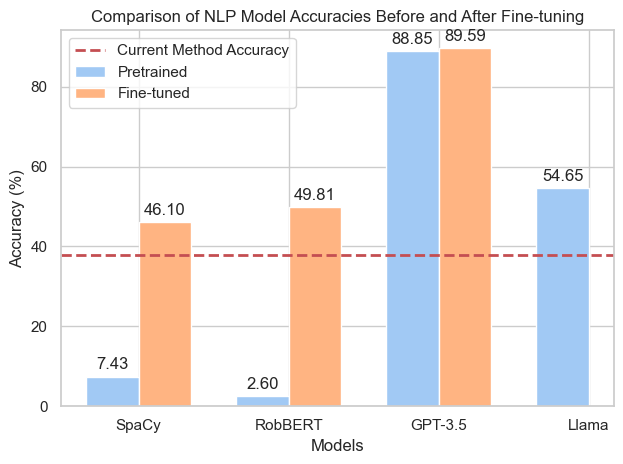

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Setting seaborn style
sns.set(style="whitegrid")

# Model names
models = ['SpaCy', 'RobBERT', 'GPT-3.5', 'Llama']

# Accuracy before fine-tuning
pretrained_accuracy = [7.43, 2.60, 88.85, 54.65]

# Accuracy after fine-tuning (None for Llama as it is only pretrained)
fine_tuned_accuracy = [46.10, 49.81, 89.59, None] 

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

# Using seaborn colors
colors = sns.color_palette("pastel")

rects1 = ax.bar(x - width/2, pretrained_accuracy, width, label='Pretrained', color=colors[0])

# Fine-tuned bars excluding Llama (handled by checking if accuracy is None)
rects2 = ax.bar(x[:-1] + width/2, fine_tuned_accuracy[:-1], width, label='Fine-tuned', color=colors[1])

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Comparison of NLP Model Accuracies Before and After Fine-tuning')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Line for current method's accuracy
current_accuracy = 37.83
ax.axhline(y=current_accuracy, color='r', linestyle='--', linewidth=2, label='Current Method Accuracy')
ax.legend()

# Attach a text label inside each bar, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height is not None:  # Only label bars with a non-None height
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
